<a href="https://colab.research.google.com/github/ShruthiAnand30/C122Hw/blob/main/Class122HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn. linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
from google.colab import files 
data = files.upload()

Saving labels.csv to labels.csv


In [3]:
from google.colab import files 
data = files.upload()

Saving image.npz to image.npz


In [4]:
X = np.load("image.npz")["arr_0"]
y = pd.read_csv("labels.csv")["labels"]
print(pd.Series(y).value_counts())
classes = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "O", "P" , "Q", "R", "S", "T", "U", "V", "W", "X", "Y", "Z"]
nclasses = len(classes)


K    550
N    550
B    550
A    550
G    550
H    550
O    550
S    550
R    550
C    550
V    550
Y    550
I    550
F    550
D    550
U    550
W    550
L    550
Z    550
M    550
T    550
Q    550
X    550
J    550
P    550
E    550
Name: labels, dtype: int64


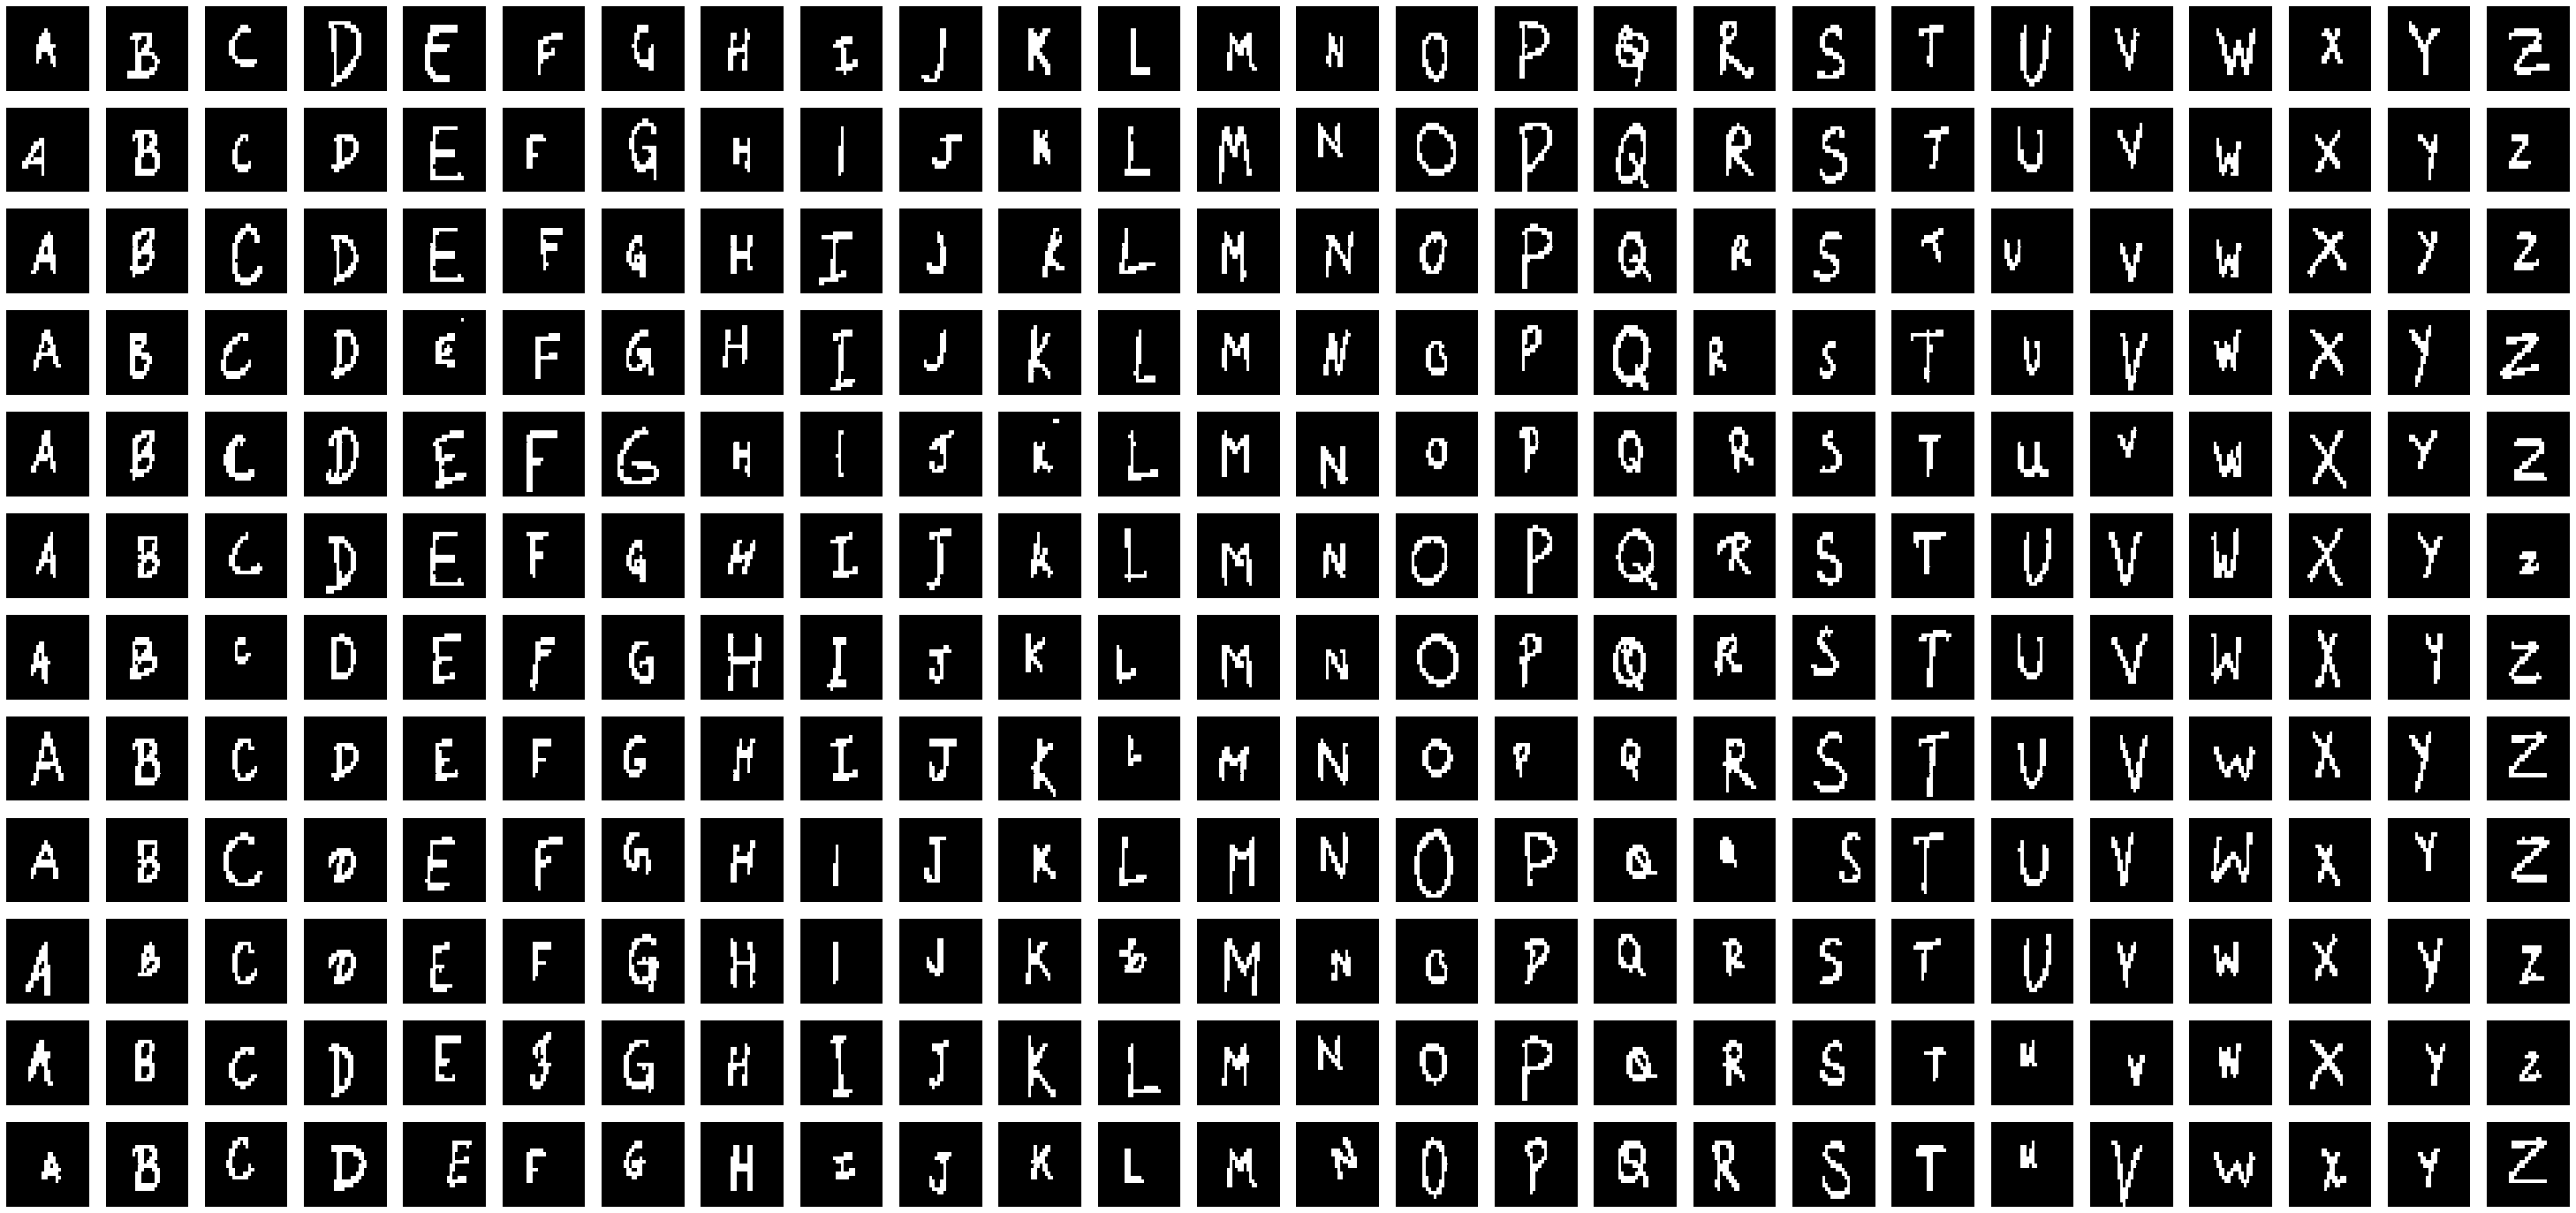

In [6]:
samples = 12
figure = plt.figure(figsize = (nclasses*2, (1+samples*2)))
idx_cls = 0
for cls in classes:
  idxs = np.flatnonzero(y==cls)
  idxs = np.random.choice(idxs, samples, replace = False)
  i = 0
  for idx in idxs:
    plt_idx = i*nclasses+idx_cls+1
    p = plt.subplot(samples, nclasses, plt_idx);
    p = sns.heatmap(np.reshape(X[idx], (22,30)), cmap = plt.cm.gray, xticklabels = False, yticklabels= False, cbar = False);
    p = plt.axis("off");
    i+= 1
  
  idx_cls+= 1

In [7]:
print(len(X))
print(len(X[0]))

14300
660


In [8]:
print(X[0])
print(y[0])

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0. 255. 255. 255. 255. 255. 255. 255. 255.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0. 255. 255. 255. 255. 255. 255. 255. 255.
 255.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0. 255. 255.   0.   0.   0.   0.
   0. 

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 9, train_size = 7500, test_size = 2500)
X_train_scale = X_train/255.0
X_test_scale = X_test/255.0

clf = LogisticRegression(solver= "saga", multi_class= "multinomial"). fit(X_train_scale, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [10]:
pred = clf.predict(X_test_scale)
accuracy = accuracy_score(y_test, pred)
print(accuracy*100)

99.52


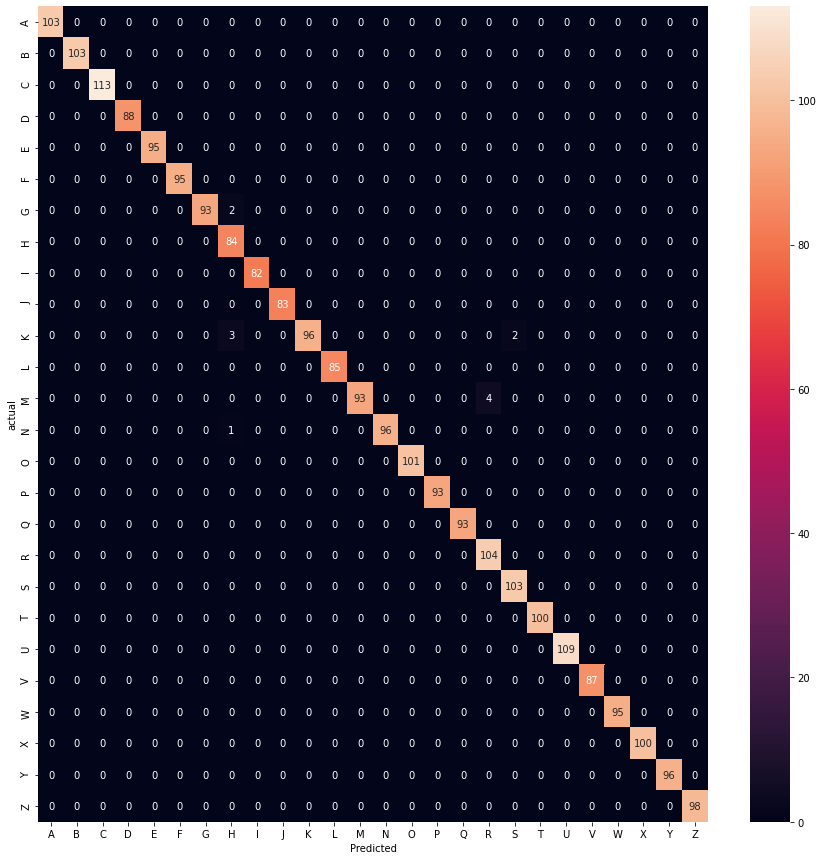

In [11]:
cm = pd.crosstab(y_test, pred, rownames = ["actual"], colnames = ["Predicted"])
p = plt.figure(figsize = (15,15));
p = sns.heatmap(cm,annot = True, fmt = "d", cbar = True)